<h1>Соколов Б ИУ5-64Б Рк1</h1>

<h1>Задача №2.</h1>
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

<h1>Датасет 6</h1>
https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [158]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv', sep=",")

In [159]:
data.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score            int64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

<h3>Находим пропуски</h3>

In [160]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.            0
GRE Score            28
TOEFL Score           0
University Rating    14
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [161]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316.0,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103,NaN,2.0,3.0,8.21,0,0.65


In [162]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 500


<h3>Вычислим процент пропусков для двух признаков</h3>

In [163]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []

# Цикл по колонкам датасета
for col in data.columns:
    # Проверим, содержит ли столбец пропущенные значения
    if data[col].isnull().any():
        # Проверим, является ли тип данных столбца числовым
        if data[col].dtype in ['float64', 'object']:
            num_cols.append(col)
            # Выведем информацию о столбце
            temp_null_count = data[data[col].isnull()].shape[0]
            temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
            print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, data[col].dtype, temp_null_count, temp_perc))

Колонка GRE Score. Тип данных float64. Количество пустых значений 28, 5.6%.
Колонка University Rating. Тип данных float64. Количество пустых значений 14, 2.8%.


In [164]:
data_num = data[num_cols]
data_num

,GRE Score,University Rating
0,337.0,4.0
1,324.0,4.0
2,316.0,3.0
3,322.0,3.0
4,314.0,NaN
...,...,...
495,332.0,NaN
496,337.0,5.0
497,330.0,5.0
498,NaN,4.0


In [165]:
data_num_GRE = data_num[['GRE Score']]
data_num_GRE.head()

,GRE Score
0,337.0
1,324.0
2,316.0
3,322.0
4,314.0


In [166]:
data_num_Rating = data_num[['University Rating']]
data_num_Rating.head()

,University Rating
0,4.0
1,4.0
2,3.0
3,3.0
4,NaN


<h3>Заполним пропуски двумя разными способами</h3>

In [167]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [168]:
GRE_data = data[['GRE Score']]
GRE_data.head()

,GRE Score
0,337.0
1,324.0
2,316.0
3,322.0
4,314.0


In [169]:
GRE_data['GRE Score'].unique()

array([337., 324., 316., 322., 314., 330., 321., 308., 302., 323., 325.,
        nan, 328., 307., 311., 317., 319., 318., 303., 312., 334., 336.,
       340., 298., 295., 310., 300., 327., 338., 331., 320., 299., 304.,
       313., 332., 326., 329., 339., 309., 315., 301., 296., 294., 290.,
       335., 333., 306., 297., 293., 305.])

Видим значение nan

<h3>Заполним наиболее частыми значениями</h3>

In [128]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(GRE_data)
data_imp

array([[337.],
       [324.],
       [316.],
       [322.],
       [314.],
       [330.],
       [321.],
       [308.],
       [302.],
       [323.],
       [325.],
       [312.],
       [328.],
       [307.],
       [311.],
       [314.],
       [317.],
       [319.],
       [318.],
       [303.],
       [312.],
       [325.],
       [312.],
       [334.],
       [336.],
       [340.],
       [322.],
       [298.],
       [295.],
       [310.],
       [300.],
       [327.],
       [338.],
       [340.],
       [331.],
       [320.],
       [299.],
       [300.],
       [304.],
       [307.],
       [308.],
       [316.],
       [313.],
       [332.],
       [326.],
       [322.],
       [329.],
       [339.],
       [321.],
       [327.],
       [313.],
       [312.],
       [334.],
       [324.],
       [322.],
       [320.],
       [312.],
       [298.],
       [300.],
       [311.],
       [309.],
       [307.],
       [304.],
       [315.],
       [325.],
       [325.],
       [32

In [129]:
# Пустые значения отсутствуют
np.unique(data_imp)

array([290., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302.,
       303., 304., 305., 306., 307., 308., 309., 310., 311., 312., 313.,
       314., 315., 316., 317., 318., 319., 320., 321., 322., 323., 324.,
       325., 326., 327., 328., 329., 330., 331., 332., 333., 334., 335.,
       336., 337., 338., 339., 340.])

Значение nan исчезло => пропусков нет

<h3>Выполним для категориального признака</h3>

In [171]:
Rating_data = data[['University Rating']]
Rating_data.head()

,University Rating
0,4.0
1,4.0
2,3.0
3,3.0
4,NaN


In [173]:
np.unique(Rating_data)

array([ 1.,  2.,  3.,  4.,  5., nan])

<h3>Заполним пропуски константой</h3>

In [172]:
# Импьютация константой
imp1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=3)
data_imp1 = imp1.fit_transform(Rating_data)
data_imp1

array([[4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [5.],
       [3.],
       [2.],
       [1.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [4.],
       [5.],
       [5.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [2.],
       [4.],
       [5.],
       [5.],
       [5.],
       [3.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [4.],
       [5.],
       [5.],
       [5.],
       [4.],
       [3.],
       [2.],
       [3.],

In [145]:
np.unique(data_imp1)

array([1., 2., 3., 4., 5.])

Пропусков нет

In [146]:
data.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316.0,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103,NaN,2.0,3.0,8.21,0,0.65
5,6,330.0,115,5.0,4.5,3.0,9.34,1,0.90
6,7,321.0,109,3.0,3.0,4.0,8.20,1,0.75
7,8,308.0,101,2.0,3.0,4.0,7.90,0,0.68
8,9,302.0,102,1.0,2.0,1.5,8.00,0,0.50
9,10,323.0,108,3.0,3.5,3.0,8.60,0,0.45


<h1>График "Скрипичная диаграмма (violin plot)" для колонки "TOEFL Score"</h1>

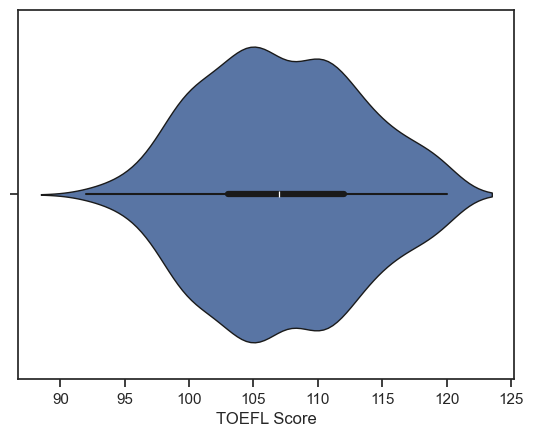

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение скрипичной диаграммы
sns.violinplot(data=data, x="TOEFL Score", linewidth=1, linecolor="k")

# Отображение графика
plt.show()